In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [4]:
gdp_df.shape # 8219 rows × 4 columns

(8219, 4)

In [5]:
gdp_df.info

<bound method DataFrame.info of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [6]:
new_gdp_df = gdp_df.drop( columns = (['Value Footnotes']))

In [7]:
new_gdp_df.columns = ['Country','Year','GDP_Per_Capita']
new_gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [8]:
gdp_counts = new_gdp_df['Country'].value_counts()
gdp_counts

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [9]:
filtered_gdp = new_gdp_df[new_gdp_df['Country'].isin(gdp_counts[gdp_counts == 34].index)]
filtered_gdp['Country'].value_counts()

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: count, Length: 228, dtype: int64

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


HISTOGRAM PLOT

In [10]:
gdp_2020 = new_gdp_df.loc[new_gdp_df.Year.isin([2020])]
gdp_2020

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

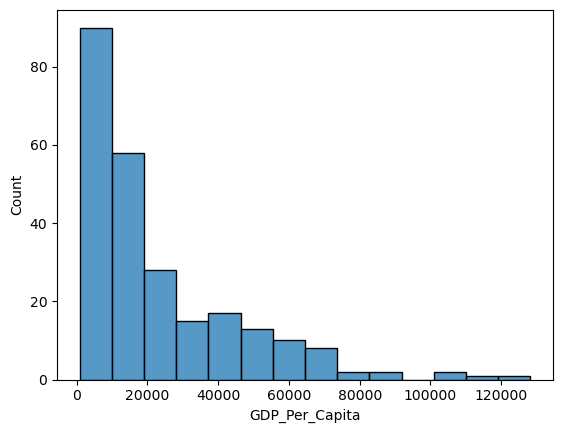

In [11]:
sns.histplot(data=gdp_2020, x="GDP_Per_Capita")

DENSITY PLOT

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

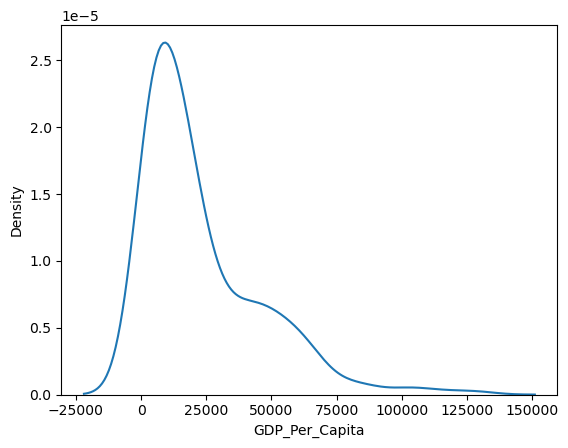

In [12]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

BOX PLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

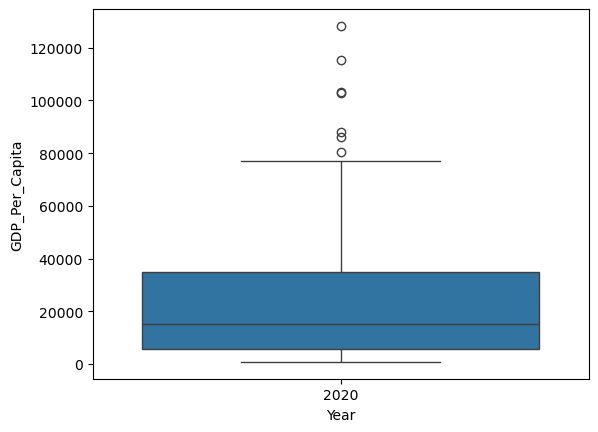

In [13]:
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

VIOLIN PLOT

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

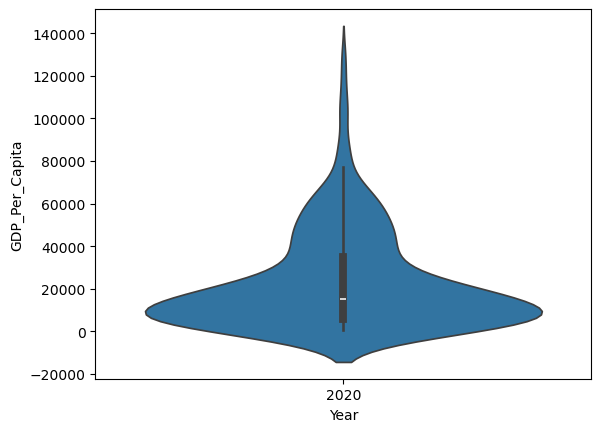

In [14]:
sns.violinplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

9. What was the median GDP per capita value in 2020?

In [15]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [16]:
years_gdp = new_gdp_df.loc[new_gdp_df.Year.isin([1990,2000,2010,2020])]
years_gdp

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


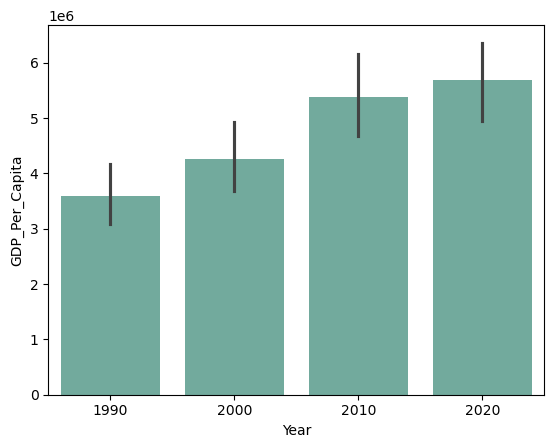

In [17]:
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=years_gdp, 
    estimator=sum,
    color='#69b3a2');

11. Which country was the first to have a GDP per capita greater than $100,000?

In [18]:
gdp_2= new_gdp_df.loc[new_gdp_df['GDP_Per_Capita'] > 100000]
gdp_2

,Country,Year,GDP_Per_Capita
750,Bermuda,2011,101174.504104
751,Bermuda,2010,105121.639689
752,Bermuda,2009,108091.644563
753,Bermuda,2008,115015.749469
754,Bermuda,2007,117742.118950
...,...,...,...
7821,United Arab Emirates,1996,100563.698291
7822,United Arab Emirates,1995,101412.082063
7825,United Arab Emirates,1992,101100.487512
7826,United Arab Emirates,1991,103098.537132


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [19]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


In [20]:
    # isclose helps return values close to the number filtered on
gdp_max = gdp_2020[np.isclose(gdp_2020['GDP_Per_Capita'], 128256.560341)] 
gdp_max

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


In [21]:
lux = new_gdp_df.loc[new_gdp_df['Country'] == 'Luxembourg']
lux

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616
4428,Luxembourg,2018,130415.193065
4429,Luxembourg,2017,131353.485059
4430,Luxembourg,2016,132836.085831
4431,Luxembourg,2015,129293.707435
4432,Luxembourg,2014,129443.183641


In [22]:
new_gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [23]:
new_gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

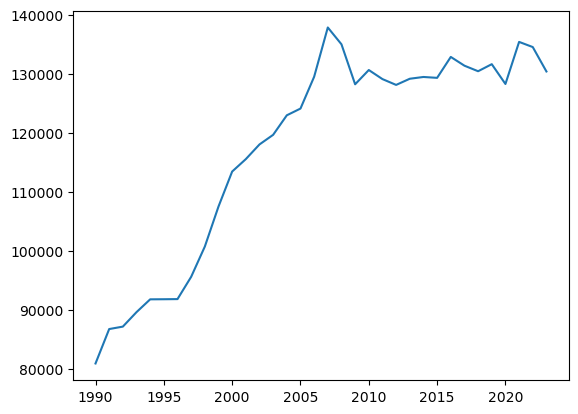

In [24]:
plt.plot(lux['Year'], lux['GDP_Per_Capita'])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [25]:
gdp_2020.min()

Country           Afghanistan
Year                     2020
GDP_Per_Capita     833.920257
dtype: object

In [26]:
afghanistan = new_gdp_df.loc[new_gdp_df['Country'] == 'Afghanistan']
afghanistan

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
5,Afghanistan,2018,2902.392113
6,Afghanistan,2017,2952.998916
7,Afghanistan,2016,2958.785399
8,Afghanistan,2015,2967.692067
9,Afghanistan,2014,3017.942544


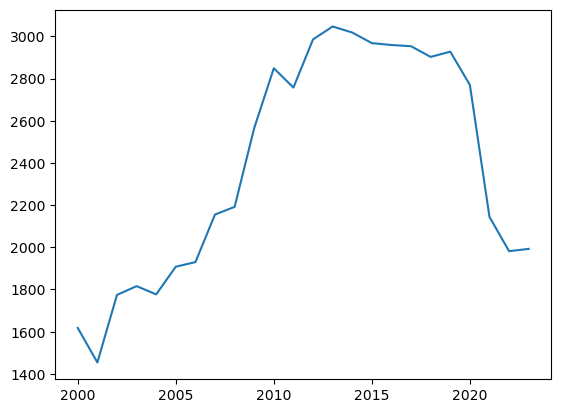

In [27]:
plt.plot(afghanistan['Year'], afghanistan['GDP_Per_Capita'])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [28]:
internet = pd.read_csv('../data/internet_use.csv.csv', on_bad_lines='warn')
internet

C:\Users\zokat\AppData\Local\Temp\ipykernel_7660\527560935.py:1: ParserWarning: Skipping line 6378: expected 4 fields, saw 6

  internet = pd.read_csv('../data/internet_use.csv.csv', on_bad_lines='warn')


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4
...,...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN,NaN
6376,294,Preliminary. Country estimate.,NaN,NaN
6377,295,18+. ITU estimate.,NaN,NaN
6378,296,ICT survey. Population age 11+,NaN,NaN


In [29]:
internet.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes     object
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [30]:
internet = internet.drop(columns = ['Value Footnotes'])

In [31]:
internet =  internet.rename(columns = {
    'Country or Area': 'Country', 
    'Value': 'Internet_Users_Pct'})
internet.tail()

,Country,Year,Internet_Users_Pct
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN
6379,297,Internet users aged 3 years and above who used...,NaN


16. Look at the number of observations in this dataset per year. What do you notice?

In [32]:
# they appear to be based on the age of users.

17. What is the first year to have a non-zero internet users percentage value?

In [33]:
users = internet.loc[~internet.Internet_Users_Pct.isin([0])]
users # 2019

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26
...,...,...,...
6375,293,Estimated based on Survey's results. Populatio...,NaN
6376,294,Preliminary. Country estimate.,NaN
6377,295,18+. ITU estimate.,NaN
6378,296,ICT survey. Population age 11+,NaN


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [34]:
users.loc[users['Year'] == '2014'].sum()

Country               AfghanistanAlbaniaAlgeriaAndorraAngolaAnguilla...
Year                  2014201420142014201420142014201420142014201420...
Internet_Users_Pct                                           9303.40467
dtype: object

In [35]:
users.loc[users['Year'] == '2000'].sum()

Country               AlbaniaAlgeriaAndorraAngolaAnguillaAntigua and...
Year                  2000200020002000200020002000200020002000200020...
Internet_Users_Pct                                          1959.800955
dtype: object

In [36]:
# 2014 had significantly more users than 2000

19. For how many countries was the percentage of internet users below 5% in 2014?

In [37]:
countries = internet.loc[internet['Internet_Users_Pct'] < 5]
countries.nunique() # 227

Country                227
Year                    29
Internet_Users_Pct    1722
dtype: int64

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [39]:
gdp_and_internet_use = pd.merge(new_gdp_df, internet, how = 'right', on = 'Country')
gdp_and_internet_use

,Country,Year_x,GDP_Per_Capita,Year_y,Internet_Users_Pct
0,Afghanistan,2023.0,1992.424394,2019,17.6
1,Afghanistan,2022.0,1981.710168,2019,17.6
2,Afghanistan,2021.0,2144.166570,2019,17.6
3,Afghanistan,2020.0,2769.685745,2019,17.6
4,Afghanistan,2019.0,2927.245144,2019,17.6
...,...,...,...,...,...
164109,293,NaN,NaN,Estimated based on Survey's results. Populatio...,NaN
164110,294,NaN,NaN,Preliminary. Country estimate.,NaN
164111,295,NaN,NaN,18+. ITU estimate.,NaN
164112,296,NaN,NaN,ICT survey. Population age 11+,NaN
